# Depth-First Search (DFS) Overview

### Definition
DFS is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root (or an arbitrary node in a graph) and explores as far as possible along each branch before backtracking.

### Key Properties
* **Data Structure:** Uses a **Stack** (LIFO).
* **Time Complexity:** $O(V + E)$ where $V$ is the number of vertices and $E$ is the number of edges.
* **Space Complexity:** $O(V)$ to store the visited set and the recursion stack.

### Common Use Cases
1.  **Topological Sorting** (Scheduling tasks with dependencies).
2.  **Pathfinding** (Finding a path between two nodes).
3.  **Solving Puzzles** (Like a maze or Sudoku).
4.  **Detecting Cycles** in a graph.

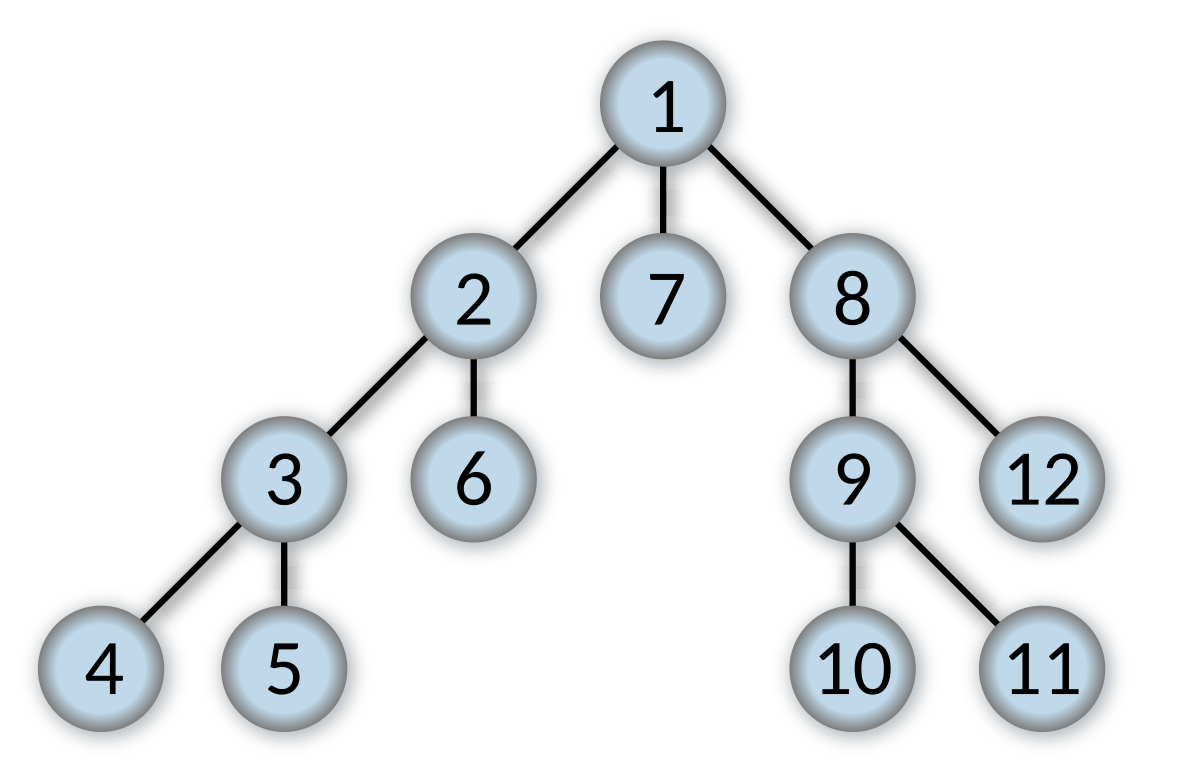

In [1]:
def dfs_general(graph):
    """
    A general DFS implementation that handles directed/undirected 
    graphs and disconnected components.
    
    Args:
        graph: Dictionary where keys are nodes and values are lists of neighbors.
    """
    visited = set()
    traversal_order = []

    def explore(node):
        visited.add(node)
        traversal_order.append(node)
        
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                explore(neighbor)

    # This loop ensures we visit nodes even if the graph is disconnected
    for vertex in graph:
        if vertex not in visited:
            explore(vertex)
            
    return traversal_order

# --- Example Usage (Physics Simulation Analogy) ---
# Imagine a system of particle interactions where some groups don't interact with others
particle_interactions = {
    "P1": ["P2", "P3"],
    "P2": ["P4"],
    "P3": [],
    "P4": ["P1"], # Cycle
    "P5": ["P6"], # Disconnected component
    "P6": []
}

result = dfs_general(particle_interactions)
print(f"Complete DFS Traversal: {result}")

Complete DFS Traversal: ['P1', 'P2', 'P4', 'P3', 'P5', 'P6']


In [2]:
def dfs_main(graph):
    """
    Main Function: Initializes tracking variables and handles 
    disconnected components in the graph.
    """
    # Use a set for O(1) lookup time complexity
    visited = set()
    # List to store the order of discovery
    traversal_order = []

    def dfs_helper(node):
        """
        Helper Function: Recursive function that explores 
        as deep as possible along a branch.
        """
        # 1. Mark the current node as visited
        visited.add(node)
        traversal_order.append(node)
        
        # 2. Explore neighbors
        # .get(node, []) ensures we don't crash if a node has no neighbors
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs_helper(neighbor)

    # 3. Iterate through all nodes in the graph
    # This handles disconnected components (nodes not reachable from the start)
    for vertex in graph:
        if vertex not in visited:
            dfs_helper(vertex)
            
    return traversal_order

# --- Test Data ---
system_graph = {
    "A": ["B", "C"],
    "B": ["D"],
    "C": [],
    "D": ["A"], # Cycle here
    "E": ["F"], # Disconnected component
    "F": []
}

print(f"Final DFS Order: {dfs_main(system_graph)}")

Final DFS Order: ['A', 'B', 'D', 'C', 'E', 'F']


| Problem | Recommended Algorithm | Reason |
| :--- | :--- | :--- |
| **Connectivity** | DFS | Simple, low memory overhead. |
| **Cycle Detection** | DFS | Naturally tracks the recursion stack. |
| **Shortest Path (Unweighted)** | **BFS** | Finds the target in the minimum number of steps. |
| **Shortest Path (Weighted)** | **Dijkstra** | Account for edge costs/weights. |
| **Topological Sort** | DFS | Perfect for resolving dependencies. |

In [3]:
def has_cycle(graph):
    visited = set()      # Nodes fully explored
    rec_stack = set()    # Nodes currently in the recursion path

    def dfs_helper(node):
        visited.add(node)
        rec_stack.add(node)

        for neighbor in graph.get(node, []):
            # If neighbor is in current recursion stack, we found a cycle!
            if neighbor in rec_stack:
                return True
            if neighbor not in visited:
                if dfs_helper(neighbor):
                    return True
        
        # Backtrack: remove node from stack as we finish exploring its branch
        rec_stack.remove(node)
        return False

    for vertex in graph:
        if vertex not in visited:
            if dfs_helper(vertex):
                return True
    return False

# Example: A -> B -> C -> A
system = {"A": ["B"], "B": ["C"], "C": ["A"]}
print(f"Cycle detected: {has_cycle(system)}")

Cycle detected: True
